In [8]:
import pandas as pd
url = 'https://raw.githubusercontent.com/OlhaOsypova/Machine-Learning-and-Data-Analytics/refs/heads/main/Individual%20assignment/var_3/games.csv'
df = pd.read_csv(url)
df

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40029,49029,32,Male,USA,Strategy,20.619662,0,Easy,4,75,85,14,Medium
40030,49030,44,Female,Other,Simulation,13.539280,0,Hard,19,114,71,27,High
40031,49031,15,Female,USA,RPG,0.240057,1,Easy,10,176,29,1,High
40032,49032,34,Male,USA,Sports,14.017818,1,Medium,3,128,70,10,Medium


In [ ]:
#Підготовка даних

In [4]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerID                   40034 non-null  int64  
 1   Age                        40034 non-null  int64  
 2   Gender                     40034 non-null  object 
 3   Location                   40034 non-null  object 
 4   GameGenre                  40034 non-null  object 
 5   PlayTimeHours              40034 non-null  float64
 6   InGamePurchases            40034 non-null  int64  
 7   GameDifficulty             40034 non-null  object 
 8   SessionsPerWeek            40034 non-null  int64  
 9   AvgSessionDurationMinutes  40034 non-null  int64  
 10  PlayerLevel                40034 non-null  int64  
 11  AchievementsUnlocked       40034 non-null  int64  
 12  EngagementLevel            40034 non-null  object 
dtypes: float64(1), int64(7), object(5)
memory usag

(40034, 13)

In [5]:
#Типи даних в датафреймі: float64(1), int64(7), object(5). 40034 рядки, 13 стовпців. Пропуски відсутні

In [20]:
df.drop('PlayerID', axis=1, inplace=True) #Видаляємо стовпчик "PlayerID" тому що він нам не знадобиться для роботи

In [8]:
df.describe()

,Age,PlayTimeHours,InGamePurchases,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked
count,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000
mean,31.992531,12.024365,0.200854,9.471774,94.792252,49.655568,24.526477
std,10.043227,6.914638,0.400644,5.763667,49.011375,28.588379,14.430726
min,15.000000,0.000115,0.000000,0.000000,10.000000,1.000000,0.000000
25%,23.000000,6.067501,0.000000,4.000000,52.000000,25.000000,12.000000
50%,32.000000,12.008002,0.000000,9.000000,95.000000,49.000000,25.000000
75%,41.000000,17.963831,0.000000,14.000000,137.000000,74.000000,37.000000
max,49.000000,23.999592,1.000000,19.000000,179.000000,99.000000,49.000000


In [9]:
#Аномальних значень не виявлено

In [10]:
#Знайомство з даними

In [16]:
df[['EngagementLevel']].value_counts()

EngagementLevel
Medium             19374
High               10336
Low                10324
Name: count, dtype: int64

In [ ]:
#19374 гравця з середнім рівнем утримання, 10336 з високим, 10324 з низьмис

In [17]:
df[['EngagementLevel']].value_counts(normalize=True) #Розрахунок у відсотках яка кількість гравців має певний рівень утримання

EngagementLevel
Medium             0.483939
High               0.258181
Low                0.257881
Name: proportion, dtype: float64

In [21]:
df[['PlayTimeHours','SessionsPerWeek','AvgSessionDurationMinutes','PlayerLevel','AchievementsUnlocked']].describe() #базові статистики для ключових числових ознак 

,PlayTimeHours,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked
count,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000
mean,12.024365,9.471774,94.792252,49.655568,24.526477
std,6.914638,5.763667,49.011375,28.588379,14.430726
min,0.000115,0.000000,10.000000,1.000000,0.000000
25%,6.067501,4.000000,52.000000,25.000000,12.000000
50%,12.008002,9.000000,95.000000,49.000000,25.000000
75%,17.963831,14.000000,137.000000,74.000000,37.000000
max,23.999592,19.000000,179.000000,99.000000,49.000000


In [22]:
df['GameGenre'].value_counts()

GameGenre
Sports        8048
Action        8039
Strategy      8012
Simulation    7983
RPG           7952
Name: count, dtype: int64

In [ ]:
#Найпопулярнішим жанром за кількість гравців є Sports  (8048 гравців), на другом місці-Action (8039), на третьому-Strategy(8012)

In [26]:
df.groupby(['GameGenre', 'EngagementLevel']).size()

GameGenre   EngagementLevel
Action      High               2064
            Low                2059
            Medium             3916
RPG         High               1988
            Low                2097
            Medium             3867
Simulation  High               2104
            Low                2088
            Medium             3791
Sports      High               2083
            Low                2074
            Medium             3891
Strategy    High               2097
            Low                2006
            Medium             3909
dtype: int64

In [27]:
#Найбільшу кількість гравців з високим утриманням має жанр Simulation (2104), на другому місці Strategy (2097), на третьому Sports (2083).
#Найбільшу кількість гравців з низьким утриманням має жанр RPG (2097), на другому місці Simulation (2088), на третьому Sports (2074)
#В кожному жанрі переважає кількість гравців з середнім рівнем утримання. Кількість гравців з різнем рівнем утримання у всіх жанрах відрізняєть але не надто суттєво, тому можемо зробити висновок що жанр впливає на рівень утримання але не дуже суттєво

In [28]:
#Порівняння двох жанрів

In [29]:
dfnew = df[df['GameGenre'].isin(['Action', 'Strategy'])] #фільтруємо датафрейм, щоб залишити лише жанри Action та Strategy

In [35]:
dfnew.groupby('GameGenre')[['Age','PlayTimeHours','SessionsPerWeek','AvgSessionDurationMinutes','PlayerLevel','AchievementsUnlocked']].mean()

,Age,PlayTimeHours,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked
GameGenre,,,,,,
Action,31.952482,12.164645,9.472820,94.782933,49.802836,24.582784
Strategy,32.016725,12.081855,9.541687,95.641538,49.900524,24.580504


In [34]:
#Ми вивели середнє значення числових стовпців 'Age','PlayTimeHours','SessionsPerWeek','AvgSessionDurationMinutes','PlayerLevel','AchievementsUnlocked' для порівння у двох жанрах: Action та Strategy 
#Середній вік гравців які грають в ігри жанру Action 31.952, тобто майже 23 роки, жанру Strategy-32.016. Середній вік майже однаковий
#Серелнє значення кількості годин за одну сесію також майже не відрізняється в цих жанрах. Action-12.164 год., Strategy-12.081 год.
#Середня кількість ігрових сесій на тиждень в іграх жанру Action = 9.472, в Strategy-9.541
#Середнє значення рівня гравці та кількісті здобутих досягнень також майже однакові, а ось середня тривалість гри трішки відрізняється, в Action 94.782 хв., в Strategy 95.641 хв, тобто майже 96 хв. 

In [55]:
categories = ['Gender', 'Location', 'GameDifficulty', 'EngagementLevel']

for col in categories:
    print({col}) 
    
    comparison_table = pd.crosstab(
        dfnew['GameGenre'],   
        dfnew[col]           
    )
    
    print(comparison_table)

{'Gender'}
Gender     Female  Male
GameGenre              
Action       3149  4890
Strategy     3230  4782
{'Location'}
Location   Asia  Europe  Other   USA
GameGenre                           
Action     1656    2428    792  3163
Strategy   1614    2359    786  3253
{'GameDifficulty'}
GameDifficulty  Easy  Hard  Medium
GameGenre                         
Action          4100  1573    2366
Strategy        3985  1573    2454
{'EngagementLevel'}
EngagementLevel  High   Low  Medium
GameGenre                          
Action           2064  2059    3916
Strategy         2097  2006    3909


In [56]:
#За допомогою методу pd.crosstab() ми порівняли категоріальні зарактеристики для наших двох жанрів
#В ігри жанру Action грає більше чоловіків та менше жінок ніж в Strategy. Але в обох жанрах основна аудиторія це чоловіки
#Більшість гравців, що грають в ігри жанру Action з США, в Strategy найбільший показник також в США
#Більший рівень складності гри мають Action ігри
#Більша кількість гравців з високим утриманням в Strategy іграх

In [57]:
#Групування гравців

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


if df['GameDifficulty'].dtype == 'object':
    df['GameDifficulty'] = df['GameDifficulty'].astype('category').cat.codes
    
features = ['Age','PlayTimeHours','SessionsPerWeek','AvgSessionDurationMinutes','PlayerLevel','AchievementsUnlocked','GameDifficulty']

X = df[features].copy()

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

cluster_sizes = df['Cluster'].value_counts()
cluster_stats = df.groupby('Cluster')[features].mean()


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [32]:
print(cluster_sizes)
print(cluster_stats)

Cluster
1    24095
0    12004
2     3935
Name: count, dtype: int64
               Age  PlayTimeHours  SessionsPerWeek  AvgSessionDurationMinutes  \
Cluster                                                                         
0        31.808730      11.931396         9.482506                  94.183106   
1        32.089023      12.064705         9.471218                  95.070969   
2        31.962389      12.060967         9.442440                  94.943837   

         PlayerLevel  AchievementsUnlocked  GameDifficulty  
Cluster                                                     
0          49.238254             24.554482        0.801316  
1          49.777506             24.573272        0.798755  
2          50.181957             24.154511        0.804320  


In [ ]:
#За допомогою методу кластеризації K-Means ми отрмали 3 групи гравців зі схожими характеристиками
#Кластер 0: середньостатистичні гравці з помірною активністю та середнім рівнем прогресу
#Кластер 1: найбільший кластер, найстарші гравці, гравці з активністю трохи вищою ніж в першому кластері, майже аналогічний рівень і прогрес
#Кластер 2: найменший кластер, гравці трохи старші ніж в першому та з трохи вищим рівнем, але з меншим числом досягнень.

In [72]:
#Модель прогнозування цільової змінної

In [21]:
#визначимо матрицю незалежних змінних (факторів) та вектор цільової (залежної) змінної
X = df.drop(columns=['EngagementLevel'], axis=1) # Незалежні змінні(фактори)
y = df['EngagementLevel']  # Цільова змінна

In [22]:
#перекодуємо категоріальні дані
from sklearn.preprocessing import OneHotEncoder

# Вибираємо категоріальні стовпці
categorical_columns = X.select_dtypes(include=['object']).columns

# Ініціалізуємо OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')

# Застосовуємо OneHotEncoder до категоріальних стовпців
encoded_columns = encoder.fit_transform(X[categorical_columns])

# Створюємо новий DataFrame з перекодованими змінними і назвами колонок
encoded_X = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(categorical_columns))

# Переконаємося, що індекси X і encoded_X співпадають
encoded_X.index = X.index

# Видаляємо оригінальні категоріальні стовпці
X = X.drop(columns=categorical_columns)

# Об'єднуємо початковий DataFrame з новими перекодованими стовпцями
X = pd.concat([X, encoded_X], axis=1)

# Перевіряємо результати
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        40034 non-null  int64  
 1   PlayTimeHours              40034 non-null  float64
 2   InGamePurchases            40034 non-null  int64  
 3   SessionsPerWeek            40034 non-null  int64  
 4   AvgSessionDurationMinutes  40034 non-null  int64  
 5   PlayerLevel                40034 non-null  int64  
 6   AchievementsUnlocked       40034 non-null  int64  
 7   Gender_Male                40034 non-null  float64
 8   Location_Europe            40034 non-null  float64
 9   Location_Other             40034 non-null  float64
 10  Location_USA               40034 non-null  float64
 11  GameGenre_RPG              40034 non-null  float64
 12  GameGenre_Simulation       40034 non-null  float64
 13  GameGenre_Sports           40034 non-null  flo

In [23]:
#розділення даних на навчальну і тестову вибірки

# імпортуємо train_test_split із модуля sklearn.model_selection
from sklearn.model_selection import train_test_split

#Розділимо дані на навчальну і тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.2, random_state=0)

In [24]:
#Реалізуємо алгоритм дерева рішень
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Створюємо модель дерева рішень
dt_model = DecisionTreeClassifier(max_depth=5, random_state=0)

# Навчаємо модель
dt_model.fit(X_train, y_train)

# Прогнозуємо на тестових даних
y_pred = dt_model.predict(X_test)

# Оцінка точності
print("Точність класифікації на тестових даних:", accuracy_score(y_test, y_pred))

# Матриця помилок
print("\nМатриця помилок:")
print(confusion_matrix(y_test, y_pred))

Точність класифікації на тестових даних: 0.8612464093917822

Матриця помилок:
[[1705   59  303]
 [  47 1645  373]
 [ 134  195 3546]]


In [25]:
#Точність моделі = 86%, у 86% випадків модель правильно визначає рівень утримання

In [26]:
from sklearn.ensemble import RandomForestClassifier

# Створюємо модель випадкового лісу
rf_model = RandomForestClassifier(
    n_estimators=100,   # кількість дерев
    max_depth=None,     # глибина дерев (None - рости до кінця)
    random_state=0
)

# Навчання моделі
rf_model.fit(X_train, y_train)

# Прогноз на тестових даних
y_pred_rf = rf_model.predict(X_test)

# Оцінка точності
print("Точність на тестових даних:", accuracy_score(y_test, y_pred_rf))

# Матриця помилок
print("\nМатриця помилок:")
print(confusion_matrix(y_test, y_pred_rf))

Точність на тестових даних: 0.910828025477707

Матриця помилок:
[[1795   64  208]
 [  51 1810  204]
 [  81  106 3688]]


In [27]:
#Точність моделі=91%, більше ніж в моделі дерева рішень

In [28]:
#Аналіз факторів впливу

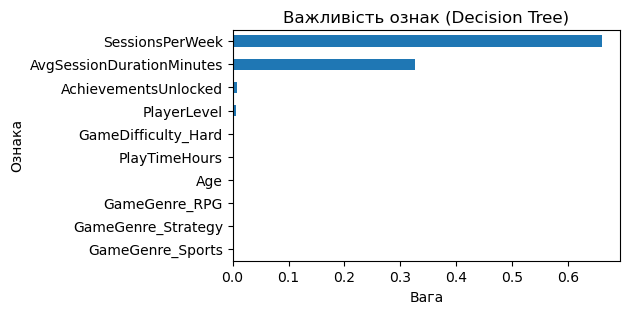

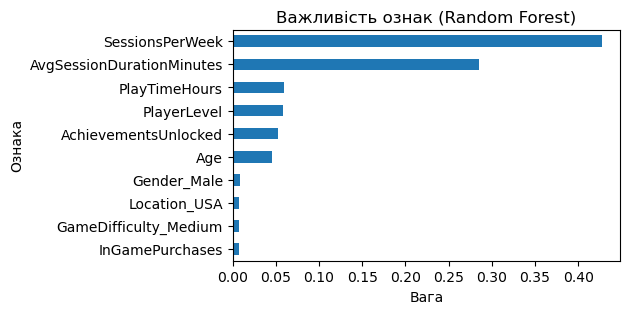

In [29]:
# Важливість ознак для дерева рішень
feature_importance_dt = pd.Series(dt_model.feature_importances_, index=X_train.columns)

# Візуалізація
import matplotlib.pyplot as plt

# Топ-10 важливих ознак
top_features = feature_importance_dt.sort_values(ascending=False).head(10)

plt.figure(figsize=(5,3))
top_features.plot(kind='barh')   # горизонтальний графік
plt.title("Важливість ознак (Decision Tree)")
plt.xlabel("Вага")             
plt.ylabel("Ознака")
plt.gca().invert_yaxis()        
plt.show()

# Важливість ознак для випадкового лісу
feature_importance_rf = pd.Series(rf_model.feature_importances_, index=X_train.columns)

# Візуалізація
import matplotlib.pyplot as plt

# Топ-10 важливих ознак
top_features = feature_importance_rf.sort_values(ascending=False).head(10)

plt.figure(figsize=(5,3))
top_features.plot(kind='barh')   # горизонтальний графік
plt.title("Важливість ознак (Random Forest)")
plt.xlabel("Вага")             
plt.ylabel("Ознака")
plt.gca().invert_yaxis()        
plt.show()

In [30]:
#В обох варіантах найбільший вплтив на рівень утримання мають показники сесій протягом тижня та середньої тривалості гри
#В моделі дерева рівень на 3 місці стоїть кілкькість здобутих досягнеть, у моделі випадкового лісу-середня кількість годин за одну сесію
#Можна зробити висновок що найбільший вплив на утримання гравців мають показники сесій протягом тижня та середньої тривалості гри